In [53]:
#dependencies for EDA
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
#other dependencies
import datetime as dt

In [55]:
#Reading dataframe from cleaning.ipynb notebook
%store -r prod_reduced

# 3. Production EDA

#### EDAnalysis Ideas 

- total count of:
    - strat/#unique skus
    - block/tons
    - shape/tons
    - size/tons
    - sku/tons
- check total number of years/months/cycles
- per year look at: 
    - by work_center, block, shape, size, sku

What to do with 30+ nulls in block/shape/size?

### Description of Variables

In [56]:
#description of variables
prod_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14820 entries, 0 to 36135
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   calendar_day                    14820 non-null  datetime64[ns]
 1   production_process              14820 non-null  category      
 2   production_process_description  14820 non-null  category      
 3   strategy                        14820 non-null  category      
 4   work_center                     13450 non-null  category      
 5   wc_description                  14820 non-null  category      
 6   block                           14815 non-null  object        
 7   shape                           14795 non-null  category      
 8   size                            14795 non-null  object        
 9   sku                             14820 non-null  object        
 10  material_description            14820 non-null  object        
 11  to

In [57]:
#Distribution of production lines (tons)
prod_reduced.describe()

,ton
count,14820.000000
mean,181.705668
std,277.146484
min,-219.000000
25%,27.000000
50%,88.000000
75%,221.000000
max,2273.000000


In [58]:
prod_reduced.head()

,calendar_day,production_process,production_process_description,strategy,work_center,wc_description,block,shape,size,sku,material_description,ton
0,2013-02-06,4310,Rolling,63.0,25000001,ROLLING - STRUCTURAL,"4"" ANG",SHAPE_L,4X4X3/8,106023315,"L 4X4X3/8 44W 60'00""",40
1,2013-02-06,4310,Rolling,63.0,25000001,ROLLING - STRUCTURAL,"4"" ANG",SHAPE_L,4X4X3/8,106022771,"L 4X4X3/8 A36/44W/A529-50 40'00""",390
2,2013-02-06,4310,Rolling,63.0,25000001,ROLLING - STRUCTURAL,"4"" ANG",SHAPE_L,4X4X3/8,106022760,"L 4X4X3/8 A36/44W/A529-50 20'00""",345
3,2013-02-06,4310,Rolling,63.0,25000001,ROLLING - STRUCTURAL,"4"" ANG",SHAPE_L,4X4X3/8,106022755,"L 4X4X3/8 55W 60'00""",205
4,2013-02-06,4310,Rolling,63.0,25000001,ROLLING - STRUCTURAL,"4"" ANG",SHAPE_L,4X4X3/8,106022749,"L 4X4X3/8 50W 60'00""",32


### Negative Production Tons (peak-only)

In [59]:
#What do we do with negative tons values in production? 
prod_reduced.loc[prod_reduced["ton"]<=0] #approx 2,300 are <=0 
#apparently most of these are materials that are being scraped

,calendar_day,production_process,production_process_description,strategy,work_center,wc_description,block,shape,size,sku,material_description,ton
830,2019-04-12,4310,Rolling,63.0,25000001,ROLLING - STRUCTURAL,"5"" ANG",SHAPE_L,5X5X1/2,106029555,"L 5X5X1/2 GGMULTI 60'00""",-6
1051,2018-11-09,4310,Rolling,63.0,25000001,ROLLING - STRUCTURAL,"5"" ANG",SHAPE_L,5X5X9/16,106019705,"L 5X5X9/16 55W 60'00""",-5
1070,2013-04-29,4310,Rolling,63.0,25000001,ROLLING - STRUCTURAL,"5 X 3"" ANG",SHAPE_L,5X3X1/4,106022690,"L 5X3X1/4 A36/44W/A529-50 20'00""",-3
1101,2016-10-06,4310,Rolling,63.0,25000001,ROLLING - STRUCTURAL,"7 X 4"" ANG",SHAPE_L,7X4X1/2,106020742,"L 7X4X1/2 44W 20'00""",0
1472,2016-07-13,4310,Rolling,63.0,25000001,ROLLING - STRUCTURAL,"6 X 4"" ANG",SHAPE_L,6X4X5/16,106020608,"L 6X4X5/16 MERSPC 40'00""",-12
...,...,...,...,...,...,...,...,...,...,...,...,...
14813,2017-04-18,4310,Rolling,40.0,NaN,1302/Not assigned,"MC3"" CHN",SHAPE_MC,3 X 7.1#,106036685,"MC 3X7.1# GGMULTI 20'00""",-3
35617,2017-01-26,4310,Rolling,40.0,NaN,1302/Not assigned,NaN,FLAT,1/4 X 5,109005365,"F 1/4X5 GGMULTI 20'00""",-2
35618,2017-02-27,4310,Rolling,40.0,NaN,1302/Not assigned,NaN,FLAT,5/16 X 8,109004173,"F 5/16X8 GGMULTI 20'00""",0
35631,2019-09-23,4310,Rolling,63.0,#,1302/Not assigned,NaN,SQUARE,130 X 130MM,102300129,"BL 130X130MM MANA-8431-502_1302 2,660 SA",-1


### Production over Time Analysis

#### Total Tons produced by Year

In [60]:
#Production Blocks by Month 2013-2019
mon_prod = prod_reduced.resample("M", on="calendar_day").sum()
tot_year = mon_prod.groupby(mon_prod.index.year).sum()
tot_year = tot_year.reset_index()
tot_year

,calendar_day,ton
0,2013,292617
1,2014,333238
2,2015,362404
3,2016,398940
4,2017,427469
5,2018,440660
6,2019,437550


Text(0.5, 0, 'Tons')

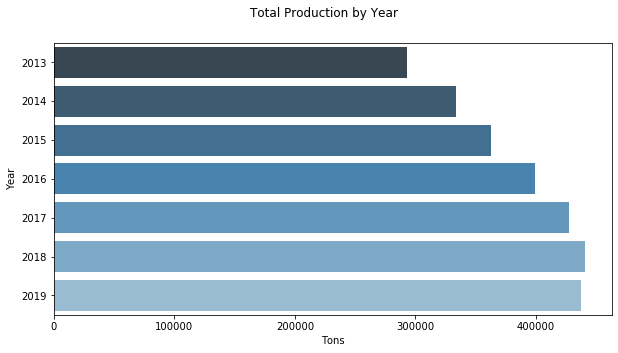

In [61]:
#put into bar chart

#set fig
fig_dims = (10,5)
fig, ax =plt.subplots(figsize=fig_dims)
fig.suptitle("Total Production by Year")

#countplot
sns.barplot(y="calendar_day", x="ton", data=tot_year, ax=ax, orient="h", palette="Blues_d")
ax.set_ylabel("Year")
ax.set_xlabel("Tons")

#### Variation of Tons Produced Overtime

Text(0, 0.5, 'Tons')

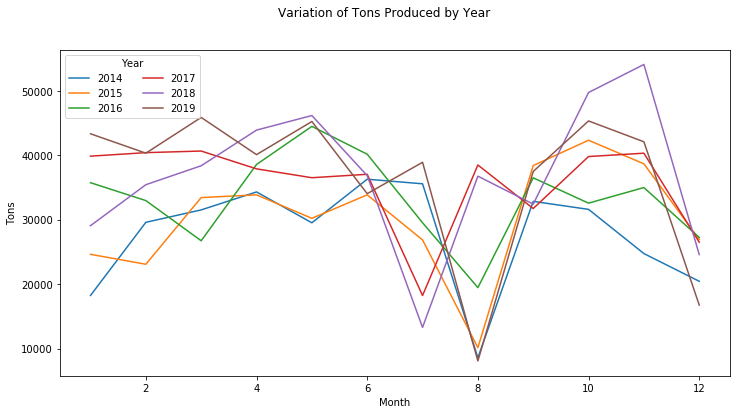

In [62]:
#create month plots by year
year_2013 = mon_prod[mon_prod.index.year == 2013]
year_2014 = mon_prod[mon_prod.index.year == 2014]
year_2015 = mon_prod[mon_prod.index.year == 2015]
year_2016 = mon_prod[mon_prod.index.year == 2016]
year_2017 = mon_prod[mon_prod.index.year == 2017]
year_2018 = mon_prod[mon_prod.index.year == 2018]
year_2019 = mon_prod[mon_prod.index.year == 2019]


#Create figure and plots
fig_dims = (12,6)
fig, ax = plt.subplots(figsize=fig_dims)
fig.suptitle("Variation of Tons Produced by Year")


ax.plot(year_2014.index.month, year_2014["ton"], label=2014)
ax.plot(year_2015.index.month, year_2015["ton"], label=2015)
ax.plot(year_2016.index.month, year_2016["ton"], label=2016)
ax.plot(year_2017.index.month, year_2017["ton"], label=2017)
ax.plot(year_2018.index.month, year_2018["ton"], label=2018)
ax.plot(year_2019.index.month, year_2019["ton"], label=2019)
#Create legend & axis names
plt.legend(loc="best", title="Year", ncol=2)
ax.set_xlabel("Month")
ax.set_ylabel("Tons")

#Remove shutdowns?, ask about shutdowns, also what happened 2016 week 13
#try to normalize and come up with a range

#### Monthly Distribution of Production

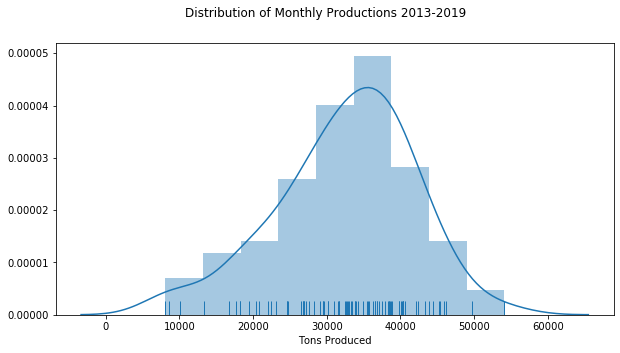

In [66]:
#Monthly Production Distribution

#Creating Fig settings
fig_dims = (10,5)
fig, ax = plt.subplots(figsize=fig_dims)
fig.suptitle("Distribution of Monthly Productions 2013-2019")
#Plotting fig
sns.distplot(mon_prod, rug=True, axlabel="Tons Produced", ax=ax)

In [67]:
#Stats of Distribution
print("Statistics of Monthly Production")
print(mon_prod.describe())
print("Skew measure:", sp.stats.skew(mon_prod))
print("Kurtosis measure:", sp.stats.kurtosis(mon_prod, fisher=False))

Statistics of Monthly Production
                ton
count     83.000000
mean   32444.313253
std     9290.715004
min     8071.000000
25%    26892.500000
50%    33435.000000
75%    38621.500000
max    54095.000000
Skew measure: [-0.51088829]
Kurtosis measure: [3.16485642]


### Strategy Analysis

In [ ]:
# Count of skus by Strategy type
print(prod_reduced.groupby("strategy")["sku"].count().sort_values(ascending=False))

### Blocks Analysis

In [68]:
# Aggregate Number of tons produced by Block
totprod_by_block = prod_reduced.groupby("block")["ton"].sum().sort_values(ascending=False)
print(len(totprod_by_block))

41


#### Total tons by Block (2013-2019)

In [69]:
#See total tons by block
print(totprod_by_block)

block
15MM               410798
20MM               270351
25MM               215253
3" ANG             176473
4" ANG             134620
2" ANG             120222
35MM               109430
2-1/2" ANG         108152
30MM               100931
6" CHN              97219
4" CHN              95525
3" CHN              84647
8" CHN              76396
3-1/2" ANG          72818
6 X 4" ANG          58871
10" CHN             55258
5" ANG              52930
4 X 3" ANG          49569
6" ANG              48886
3 X 2" ANG          45943
5 X 3-1/2" ANG      45297
5" CHN              40515
6" FLT              39053
8" FLT              36537
6 X 3-1/2" ANG      27672
5 X 3" ANG          26315
7" CHN              22447
5" FLT              16589
3-1/2X2-1/2"ANG     12096
7" FLT              11382
7 X 4" ANG          10687
9" CHN              10504
10" FLT              2354
12" CHN              1790
MC3" CHN             1585
2-1/2 X 2" ANG       1379
3 X 2-1/2" ANG       1283
16M                   508
MC4" C

#### Percentage Distribution of Production by Block

In [70]:
#top 22 out of 41
top22 = totprod_by_block[:22]
#Create other categories anything less than 40K tons, bottom 19 out of 44
bottom19 = totprod_by_block[22:].sum()
bottom19 = pd.Series(bottom19)
bottom19.rename({0:"Other"}, inplace=True)

In [71]:
#join top22 + bottom19
total_blocks = top22.append(bottom19)

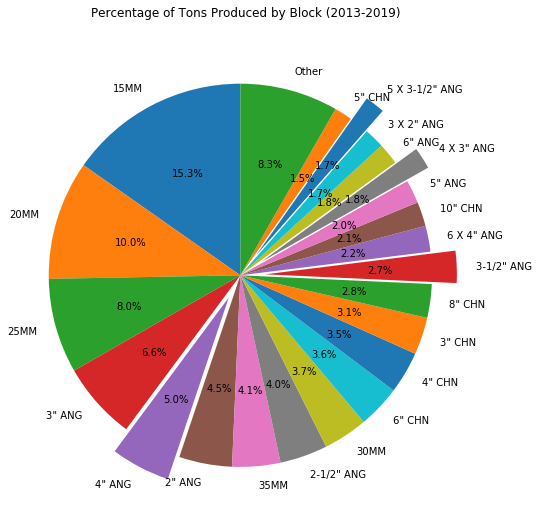

In [72]:
#PieChart by Block
fig_dims = (8,8)
fig, ax1 = plt.subplots(figsize=fig_dims)
fig.suptitle("Percentage of Tons Produced by Block (2013-2019)")
explode = [0 for block in range(23)]
explode[4] = 0.13
explode[13] = 0.13
explode[17:21] = [0.13,0,0,0.135]

#Create plot & title
ax1.pie(total_blocks, labels=total_blocks.index, autopct='%1.1f%%', shadow=False, startangle=90, explode=explode)
ax1.axis('equal')

plt.show()
#blocks near 4" ANG (requested by business): 5X3-1/2", 5X3", FT, 4X3" and 3-1/2" 

In [73]:
#aggregate by date and block
block_prod = prod_reduced.groupby(["calendar_day","block"]).sum()
block_prod

ton
calendar_day block               
2013-02-04   15MM             118
             4" ANG            56
2013-02-05   15MM            1189
             4" ANG           522
2013-02-06   15MM            1198
...                           ...
2019-12-30   5 X 3-1/2" ANG    -5
             5" ANG            -9
             6 X 4" ANG        -6
             7" CHN            -5
             9" CHN            -5

[5622 rows x 1 columns]

#### Average Production per Block

In [74]:
#Count of productions by block
block_temp = block_prod.reset_index()

block_temp = block_temp.groupby([block_temp["calendar_day"].dt.year,block_temp["calendar_day"].dt.month,"block"])["ton"].sum()
block_temp.rename_axis(["year","month","block"], inplace=True)

block_temp = block_temp.reset_index()

# print("Total tons per block:",block_temp.groupby("block")["ton"].sum())
# print("Total count of blocks produced '13-19:", block_temp["block"].value_counts())
print("Avg. tons per block:") 
np.rint(block_temp.groupby("block")["ton"].sum()/block_temp["block"].value_counts())
#MAKE THIS NEAT put it into a dataframe

Avg. tons per block:


10" CHN            1105.0
10" FLT             588.0
12" CHN             199.0
15MM               5200.0
16M                 508.0
2" ANG             1670.0
2-1/2 X 2" ANG      276.0
2-1/2" ANG         1567.0
20MM               3557.0
25MM               2832.0
3 X 2" ANG          779.0
3 X 2-1/2" ANG      214.0
3" ANG             2715.0
3" CHN             1459.0
3-1/2" ANG         1255.0
3-1/2X2-1/2"ANG     390.0
30MM               1422.0
35M                  32.0
35MM               1563.0
4 X 3" ANG          901.0
4" ANG             2103.0
4" CHN             1516.0
5 X 3" ANG          598.0
5 X 3-1/2" ANG      871.0
5" ANG             1080.0
5" CHN              794.0
5" FLT              592.0
6 X 3-1/2" ANG      589.0
6 X 4" ANG         1051.0
6" ANG             1063.0
6" CHN             1519.0
6" FLT              930.0
7 X 4" ANG          486.0
7" CHN              724.0
7" FLT              542.0
8" CHN             1389.0
8" FLT              891.0
9" CHN              750.0
MC3" CHN    

### Size Analysis

In [ ]:
# Aggregate Number of tons produced by Size
print(prod_reduced.groupby("size")["ton"].sum().sort_values(ascending=False))

### Sku Analysis

In [ ]:
# Aggregate Number of tons produced by SKU
prodby_sku = prod_reduced.groupby(["sku","material_description"])["ton"].sum().sort_values(ascending=False)
print(prodby_sku)